In [ ]:
%load_ext autoreload
%autoreload 2
import os 
os.chdir("/home/adnane/Desktop/satellite-yasser-run/Satellite_Super_Resulotion0")

import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
import torch.nn.functional as F

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from importlib import reload    

from src.utils.config import CONFIG

from src.utils.data_loader import create_loaders
from notebooks.yasser.custom_model import Custom_model     
from src.utils.train_model_sr import train_model_sr
import json
from src.utils.perceptual_loss import PerceptualLoss,CustomLoss

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device : {device}")

# CONFIG FROM YAML 
data_root      = CONFIG["paths"]["output_root"]
batch_size     = 64 #CONFIG["training"]["batch_size"]
num_workers    = CONFIG["training"]["num_workers"]
use_aug        = CONFIG["training"].get("use_augmentation", True)

# HYPERPARAMS FROM CONFIG 
lr              = 0.0001 #CONFIG["training"]["lr"]
weight_decay    = 0
num_epochs      = 15 #CONFIG["training"]["epochs"]
step_size       = 30 #CONFIG["training"]["scheduler_step_size"]
gamma           = 0.5 #CONFIG["training"]["scheduler_gamma"]


# LOAD DATA 

train_loader, val_loader, test_loader = create_loaders(
    root=data_root,
    batch_size=batch_size,
    num_workers=num_workers,
    use_augmentation=use_aug
)

model_large = Custom_model(n_HF_blocks=8,n_MS_blocks=2,n_LF_blocks=16).to(device)
perceptual_loss = PerceptualLoss(layers=['relu3_3']).to(device)

criterion = CustomLoss(
    perceptual_criterion=perceptual_loss,
    pixel_criterion=nn.L1Loss(),
    factor=0.025   
).to(device)
optimizer = optim.Adam(model_large.parameters(), lr=lr, betas=(0.9, 0.999), weight_decay=weight_decay)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[15, 30, 45], gamma=0.5)

best_model_path = CONFIG["model"]["best_custom_large_path"]
last_model_path = CONFIG["model"]["last_custom_large_path"]
history_path = CONFIG["history"]["custom_large_history_path"]

device : cuda

 DATA LOADED:
  Train: 152352 samples
  Val:   19044 samples
  Test:  19044 samples


/home/yasser/classes/DL26/final_Project/src/utils/train_model_sr.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=d

Loading LAST checkpoint: src/models/checkpoints/custom_large/last_custom_large.pth
 Resume from epoch 20 | Best PSNR = 27.65
 Loading training history...

 [custom_model_large] Epoch 21/30


Train loss: 0.029756 | Train PSNR: 26.04 dB
Val   loss: 0.029011 | Val   PSNR: 27.63 dB
-> LR: 0.00005000

 [custom_model_large] Epoch 22/30


 New BEST model saved at epoch 22 with PSNR = 27.65
Train loss: 0.029727 | Train PSNR: 26.05 dB
Val   loss: 0.028944 | Val   PSNR: 27.65 dB
-> LR: 0.00005000

 [custom_model_large] Epoch 23/30


 New BEST model saved at epoch 23 with PSNR = 27.68
Train loss: 0.029699 | Train PSNR: 26.06 dB
Val   loss: 0.028811 | Val   PSNR: 27.68 dB
-> LR: 0.00005000

 [custom_model_large] Epoch 24/30


 New BEST model saved at epoch 24 with PSNR = 27.69
Train loss: 0.029672 | Train PSNR: 26.06 dB
Val   loss: 0.028743 | Val   PSNR: 27.69 dB
-> LR: 0.00005000

 [custom_model_large] Epoch 25/30


Train loss: 0.029648 | Train PSNR: 26.06 dB
Val   loss: 0.029046 | Val   PSNR: 27.64 dB
-> LR: 0.00005000

 [custom_model_large] Epoch 26/30


Train loss: 0.029621 | Train PSNR: 26.07 dB
Val   loss: 0.028845 | Val   PSNR: 27.67 dB
-> LR: 0.00005000

 [custom_model_large] Epoch 27/30


Train loss: 0.029598 | Train PSNR: 26.07 dB
Val   loss: 0.029016 | Val   PSNR: 27.66 dB
-> LR: 0.00005000

 [custom_model_large] Epoch 28/30


Train loss: 0.029575 | Train PSNR: 26.08 dB
Val   loss: 0.028890 | Val   PSNR: 27.68 dB
-> LR: 0.00005000

 [custom_model_large] Epoch 29/30


Train loss: 0.029551 | Train PSNR: 26.09 dB
Val   loss: 0.028899 | Val   PSNR: 27.68 dB
-> LR: 0.00005000

 [custom_model_large] Epoch 30/30


 New BEST model saved at epoch 30 with PSNR = 27.72
Train loss: 0.029529 | Train PSNR: 26.09 dB
Val   loss: 0.028690 | Val   PSNR: 27.72 dB
-> LR: 0.00002500


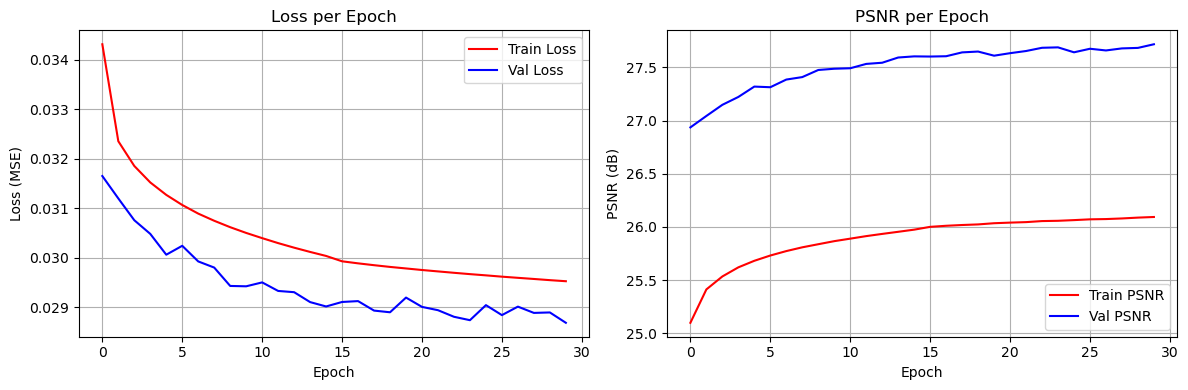

0

In [3]:
num_epochs = 10
train_model_sr(
    model=model_large,
    model_name="custom_model_large",
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=num_epochs,
    scale_factor=4,
    model_requires_upscale=False,
    best_model_path=best_model_path,
    last_model_path=last_model_path,
    mode="resume",
    history_path=history_path,
    use_amp=True  
)


In [4]:
print(model_large)

Custom_model(
  (up_stream): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MultiScale_ResidualBlock(
      (small_conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (large_conv1): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (small_conv2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (large_conv2): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (fusion): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (2): MultiScale_ResidualBlock(
      (small_conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (large_conv1): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (small_conv2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (large_conv2): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (fu